# Keras -Tensorflow

In [54]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [55]:
df = pd.read_csv('./datasets/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [56]:
labels = df['variety']
features = df.drop('variety', axis=1)

In [57]:
# convert the labels to one-hot encoding
labels = pd.get_dummies(labels)

In [58]:
# convert the dataframes to numpy arrays
X = features.values
y = labels.values

In [59]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (113, 4)
y_train shape: (113, 3)
X_test shape: (8, 4)
y_test shape: (8, 3)


## Model Architecture

In [60]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                80        
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile Model

In [78]:
model.compile(optimizer='adam' #(lr=0.001) ,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Train the model

In [79]:
history = model.fit(X_train, y_train,
          batch_size=12,
          epochs=20,
          validation_data=(X_val, y_val))


Epoch 1/20
10/10 [==============================] - 1s 44ms/step - loss: 0.3233 - accuracy: 0.9735 - val_loss: 0.2457 - val_accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 0s 10ms/step - loss: 0.3161 - accuracy: 0.9646 - val_loss: 0.2357 - val_accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.3111 - accuracy: 0.9646 - val_loss: 0.2305 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.3057 - accuracy: 0.9646 - val_loss: 0.2296 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.2988 - accuracy: 0.9823 - val_loss: 0.2224 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.2937 - accuracy: 0.9735 - val_loss: 0.2182 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 12ms/step - loss: 0.2887 - accuracy: 0.9823 - val_loss: 0.2138 - val_accuracy: 1.0000
Epoch 8/20
10

In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [81]:
# Evaluate the model on the test data
_, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 50ms/step - loss: 0.2050 - accuracy: 0.8750
Test accuracy: 0.875


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

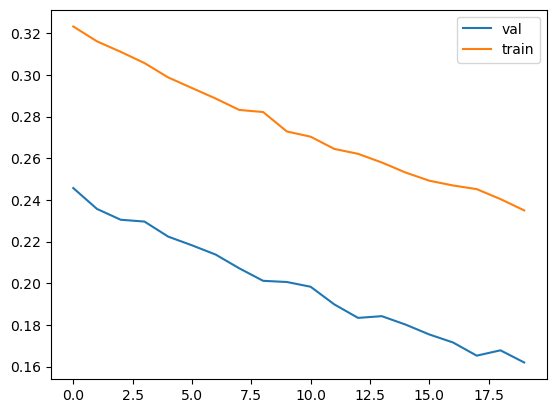

In [83]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

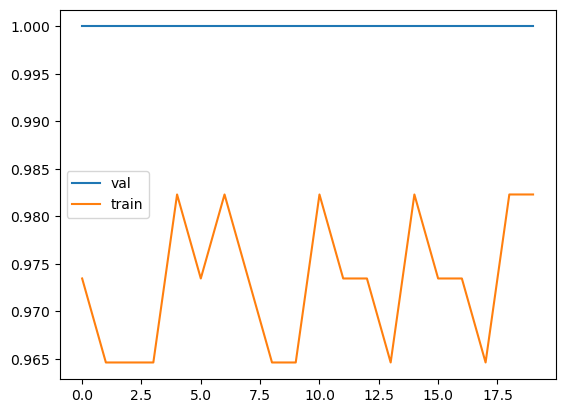

In [84]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

In [85]:
loss, acc = model.evaluate(X_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

1/1 [==============================] - 0s 63ms/step - loss: 0.2050 - accuracy: 0.8750

Testing loss: 0.21, acc: 0.88%


## Prediction

In [86]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(X_test)

1/1 [==============================] - 0s 105ms/step


In [87]:
predicted_classes = np.argmax(predicted, axis=1)

In [88]:

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

predicted:
[2 0 2 1 0 0 2 1]
True Label:
[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]
